# Research Question:

## Did boycotting affect Starbucks' stock prices?

In [ ]:
#The needed libraies
import pandas as pd
import numpy as np

import scipy.stats as statsmodels
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import stats

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pmdarima as pm

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mpimg

from PIL import Image

In [ ]:
df = pd.read_csv("Starbucks Dataset.csv")

In [ ]:
print(df.isnull().sum())
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Overview on the dataset:

In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,8036,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8.036000e+03
mean,2008-06-06 01:47:20.219014400,30.054280,30.351487,29.751322,30.058857,26.674025,1.470459e+07
min,1992-06-26 00:00:00,0.328125,0.347656,0.320313,0.335938,0.260703,1.504000e+06
25%,2000-06-08 18:00:00,4.392031,4.531250,4.304922,4.399610,3.414300,7.817750e+06
50%,2008-06-07 12:00:00,13.325000,13.493750,13.150000,13.330000,10.352452,1.169815e+07
75%,2016-05-31 06:00:00,55.250000,55.722501,54.852499,55.267499,47.464829,1.778795e+07
max,2024-05-23 00:00:00,126.080002,126.320000,124.809998,126.059998,118.010414,5.855088e+08
std,NaN,33.615577,33.906613,33.314569,33.615911,31.728090,1.340021e+07


## Stock Closing Prices Over Time

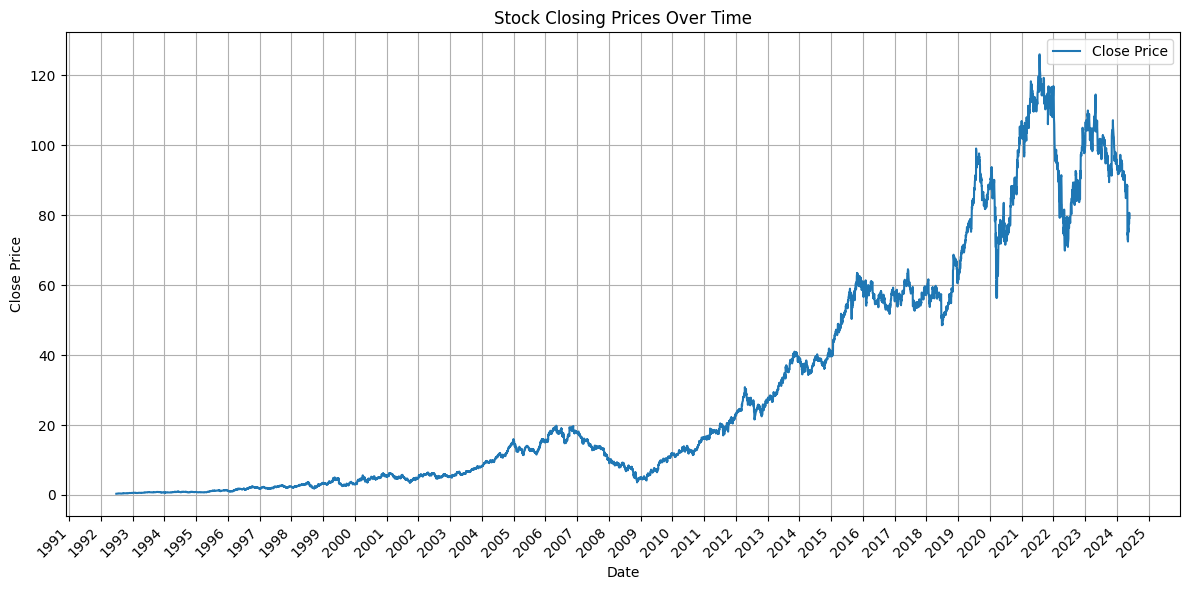

In [ ]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')

# Format the x-axis to show dates in terms of years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Closing Prices Over Time')
plt.legend()
plt.grid(True)

# Rotate the x-axis labels and adjust spacing
plt.gcf().autofmt_xdate(rotation=45)
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap

plt.show()

### Observations on the graph above


- Flat and Low Prices: From 1991 to around 2000, the stock price remained relatively flat and low, indicating slow growth or stable performance without significant changes.

Growth Phase (2000 - 2008):
- Gradual Increase: Starting around 2000, the stock price began to rise more noticeably, showing a period of growth.
- Market Corrections: There are observable dips, suggesting periodic market corrections or responses to economic events.

Recession Impact (2008):
- Sharp Decline: In 2008, there is a significant drop in the stock price, likely corresponding to the global financial crisis. This indicates the stock was affected by the broader market downturn.

Post-Recession Recovery (2009 - 2014):
- Steady Recovery and Growth: After the 2008 decline, the stock price recovered and continued to grow steadily, reflecting economic recovery and possibly strong company performance.

Rapid Growth Phase (2014 - 2021):
- Accelerated Increase: From 2014 onwards, there is a marked acceleration in the stock price increase, indicating a period of rapid growth. This could be due to successful business strategies, market expansion, or other positive factors influencing the company's value.

Volatility and Highs (2021 - 2024):
- Peaks and Volatility: The stock reaches its highest levels around 2021 and 2022, but also shows increased volatility with sharp rises and falls. This could be due to pandemics, market speculations, economic uncertainty, or significant company-specific events.
- Recent Decline: There is a noticeable decline in the stock price in 2024, suggesting potential challenges faced by the company or broader market corrections.

## Volatility Over Time

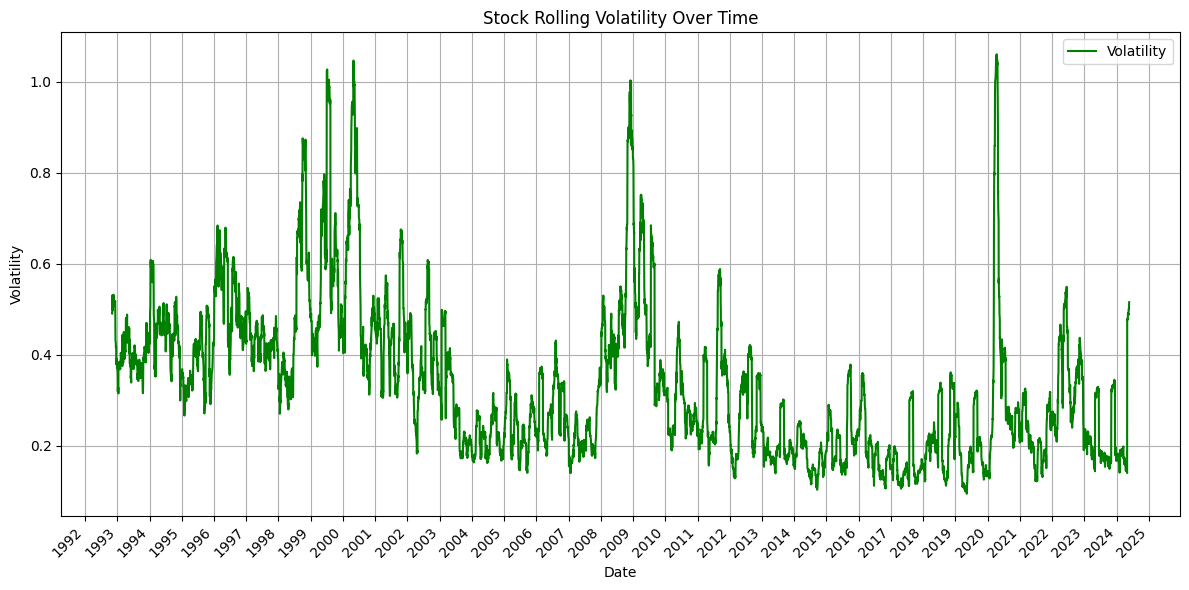

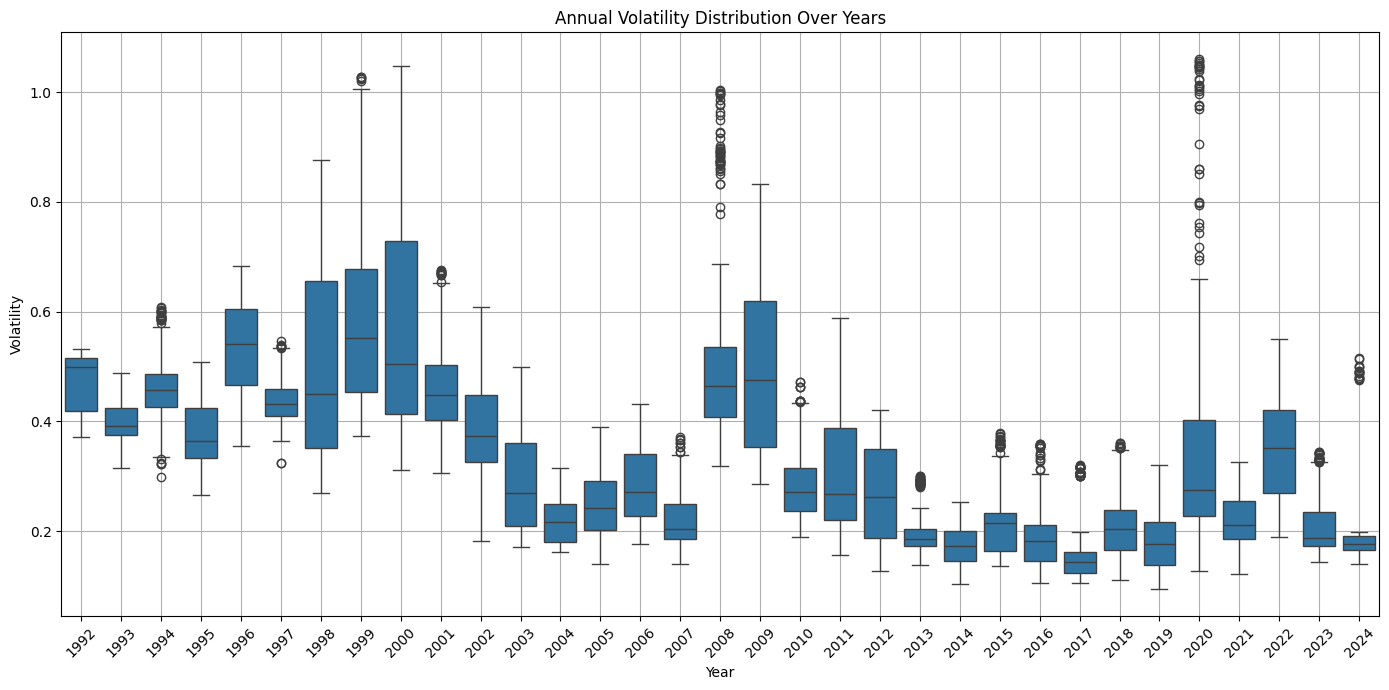

In [ ]:

# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Calculate rolling volatility (standard deviation) over a 30-day window and annualize it
df['Volatility'] = df['Daily Return'].rolling(window=30).std() * np.sqrt(252)

# Drop NaN values created by the rolling function
df = df.dropna()

# Plot the rolling volatility over time using a line graph
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='green')

# Format the x-axis to show dates in terms of years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Stock Rolling Volatility Over Time')
plt.legend()
plt.grid(True)

# Rotate the x-axis labels and adjust spacing
plt.gcf().autofmt_xdate(rotation=45)
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap

plt.show()

# Extract year from date
df['Year'] = df['Date'].dt.year

# Plot box plots for each year
plt.figure(figsize=(14, 7))
sns.boxplot(x='Year', y='Volatility', data=df)
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.title('Annual Volatility Distribution Over Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations on the graph above:

General Volatility Levels:
- Median Volatility: The median volatility typically ranges between 1.0 to 1.3 across most years, suggesting a relatively stable level of annualized volatility in the long term.
- Fluctuations: There are noticeable fluctuations around this median level, with some years displaying higher median volatility and others lower.

Years with High Volatility:
- Characteristics: Certain years exhibit higher volatility, characterized by wider boxes and longer whiskers in the boxplots, indicating a broader range of volatility. Notable examples include 1994, 2000, 2008, and 2020.
- Outliers: These periods often contain more outliers, pointing to episodes of extreme volatility.

Years with Low Volatility:
- Characteristics: Some years, such as 1997, 2010, and 2012, show lower volatility with narrower boxes and shorter whiskers.
- Consistency: These years typically have fewer outliers and a tighter range around the median, suggesting more stable periods.

Outliers:
- Observations: Outliers are apparent in several years, signifying occasional spikes in extreme volatility. Years with multiple notable outliers include 1991, 1994, 2008, and 2020.
- Correlation with Events: These outliers often align with significant economic events or market disruptions.

Historical Events and Their Impact:
- 2000-2002: The period of the dot-com bubble burst, showing higher volatility.
- 2008-2009: The global financial crisis, marked by high volatility and numerous outliers in 2008.
- 2020: The COVID-19 pandemic, which caused significant market disruptions, is reflected in increased volatility and the presence of outliers.

Summary of Patterns:
- Stable Periods: Years like 1997, 2010, and 2012 are characterized by lower and more consistent volatility, indicating relative market stability.
- Volatile Periods: Years such as 1994, 2000, 2008, and 2020 exhibit higher and more variable volatility, often linked to significant market or economic events.
- Extreme Volatility: The presence of outliers in certain years underscores extreme market reactions or anomalies.

Conclusion:
The boxplot visualization effectively highlights the variability in volatility across different years. It delineates both periods of stability and significant market turmoil, frequently aligning with major historical economic events. This analysis aids in understanding how external factors and market conditions have historically impacted stock volatility, providing valuable insights for both historical analysis and future forecasting.

## Total Volume Over Time

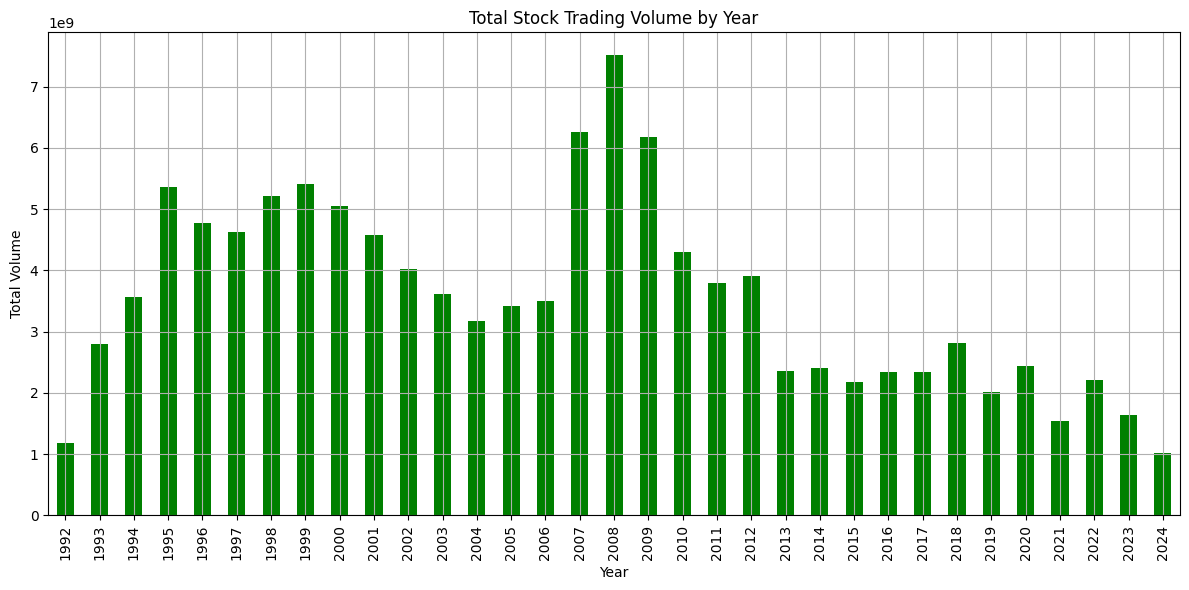

In [ ]:


# Bar Chart for Volume by Year
volume_by_year = df.groupby(df['Date'].dt.year)['Volume'].sum()
plt.figure(figsize=(12, 6))
volume_by_year.plot(kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.title('Total Stock Trading Volume by Year')
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations on the graph above:

Based on the bar chart visualization of the total stock trading volume by year, we can observe several trends and patterns over the years. Here’s a detailed analysis:

Observations and Analysis

General Trends:
1. Increasing Volume Trend (1992 - 2000):
   - From 1992 to around 2000, there is a general upward trend in trading volume. This suggests growing interest and activity in the stock market during this period.
   - The increase could be attributed to various factors such as economic growth, increased market participation, and rising stock prices.

2. Peak Volumes (2007 - 2009):
   - The trading volume peaks significantly around 2007 to 2009, with the highest volume observed in 2008.
   - This period coincides with the global financial crisis, where market volatility and trading activity were extremely high as investors reacted to the economic turmoil.

3. Decreasing Volume Trend (2010 - 2014):
   - Following the peak in 2008, there is a noticeable decline in trading volume from 2010 onwards, reaching lower levels by 2014.
   - This decrease might be due to the market stabilization post-crisis, reduced volatility, and possibly lower investor participation or confidence in the market.

Specific Patterns:
1. Early 1990s:
   - The trading volume in the early 1990s starts relatively low but shows a steady increase year by year.
   - This may indicate a period of gradual market development and increasing investor engagement.

2. Mid to Late 1990s:
   - Trading volumes in the mid to late 1990s show a strong growth trajectory, reflecting a period of economic expansion and bullish market conditions.

3. 2000 - 2006:
   - Trading volumes appear relatively stable but at high levels during this period, with minor fluctuations.
   - This could indicate sustained market interest and steady trading activity before the financial crisis.

4. 2007 - 2009:
   - A sharp spike in trading volume is observed during the financial crisis, with 2008 showing the highest volume.
   - High trading volumes during crises are typical as investors frequently buy and sell in response to market uncertainty and rapid price changes.

5. Post-Crisis (2010 - 2014):
   - The trading volume declines steadily after the crisis peak, stabilizing at lower levels by 2014.
   - This may reflect a period of market recovery, reduced speculative trading, and a return to more typical trading activities.

Interpretation:
- Economic Indicators: The trading volume trends closely follow major economic events. High volumes during the late 1990s and 2007-2009 correspond to economic booms and crises.
- Investor Behavior: Peaks in trading volumes often indicate periods of high investor activity, typically driven by market volatility and significant price movements.
- Market Stability: Lower and more stable volumes post-2010 suggest a return to normalcy and possibly a more stable market environment.

Conclusion:
The bar chart effectively highlights the overall trends and specific patterns in trading volume over the years. The analysis shows how external economic events and market conditions impact investor behavior and trading activity. This visualization helps in understanding the dynamics of market participation and the impact of major economic events on trading volumes.

## Correlation between Volume and Volatility

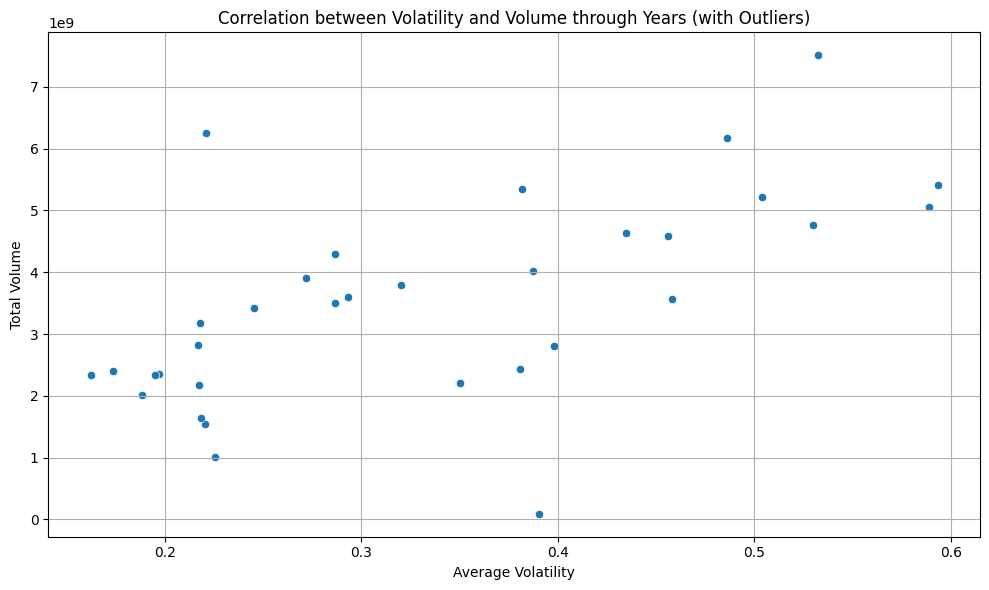

Pearson correlation with outliers: 0.6146566631423848, P-value: 0.00014139337799745302


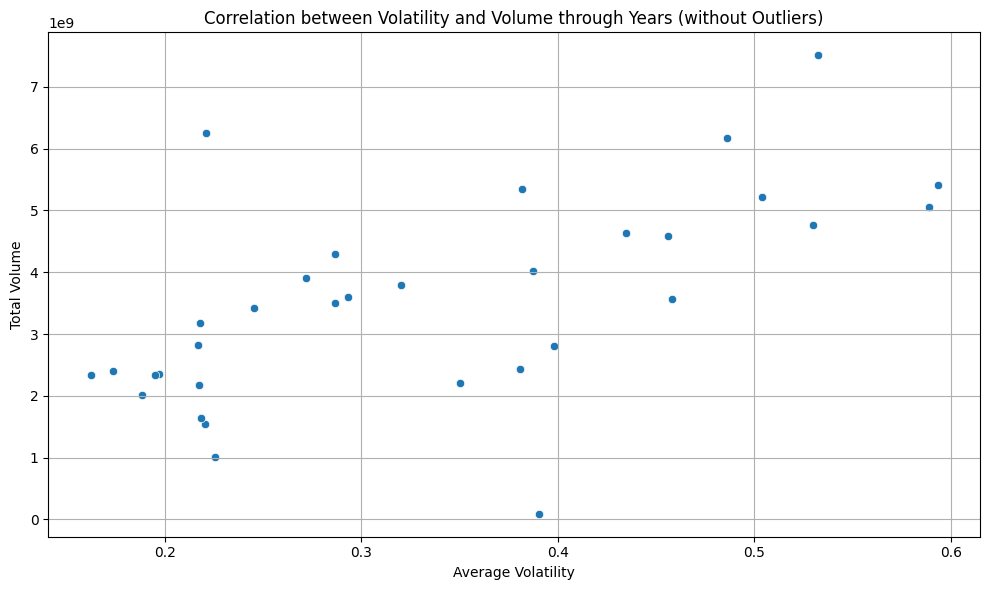

Pearson correlation without outliers: 0.6146566631423848, P-value: 0.00014139337799745302


In [ ]:
# Calculate daily returns and volatility
df['Daily Return'] = df['Close'].pct_change()
df['Volatility'] = df['Daily Return'].rolling(window=30).std() * np.sqrt(252)

# Drop NaN values
df = df.dropna()

# Calculate annual volume and average volatility
df['Year'] = df['Date'].dt.year
annual_data = df.groupby('Year').agg({'Volume': 'sum', 'Volatility': 'mean'}).reset_index()

# Plot the dot plot with outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volatility', y='Volume', data=annual_data)
plt.xlabel('Average Volatility')
plt.ylabel('Total Volume')
plt.title('Correlation between Volatility and Volume through Years (with Outliers)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate Pearson correlation with outliers
correlation_with_outliers, p_value_with_outliers = pearsonr(annual_data['Volatility'], annual_data['Volume'])
print(f"Pearson correlation with outliers: {correlation_with_outliers}, P-value: {p_value_with_outliers}")

# Identify and remove outliers using IQR method
Q1 = annual_data[['Volume', 'Volatility']].quantile(0.25)
Q3 = annual_data[['Volume', 'Volatility']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
annual_data_no_outliers = annual_data[~(
    (annual_data['Volume'] < (Q1['Volume'] - 1.5 * IQR['Volume'])) | 
    (annual_data['Volume'] > (Q3['Volume'] + 1.5 * IQR['Volume'])) |
    (annual_data['Volatility'] < (Q1['Volatility'] - 1.5 * IQR['Volatility'])) | 
    (annual_data['Volatility'] > (Q3['Volatility'] + 1.5 * IQR['Volatility']))
)]

# Plot the dot plot without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volatility', y='Volume', data=annual_data_no_outliers)
plt.xlabel('Average Volatility')
plt.ylabel('Total Volume')
plt.title('Correlation between Volatility and Volume through Years (without Outliers)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate Pearson correlation without outliers
correlation_without_outliers, p_value_without_outliers = pearsonr(annual_data_no_outliers['Volatility'], annual_data_no_outliers['Volume'])
print(f"Pearson correlation without outliers: {correlation_without_outliers}, P-value: {p_value_without_outliers}")

## Conclusion on the scatterplot:

The correlation between the Total Volume and Volatility is high, and with or without outliers yielded the same results for the Pearson coefficient. That may indicate that they share the same causes. 

# Comparison Between Stock Market Before And After October 2023

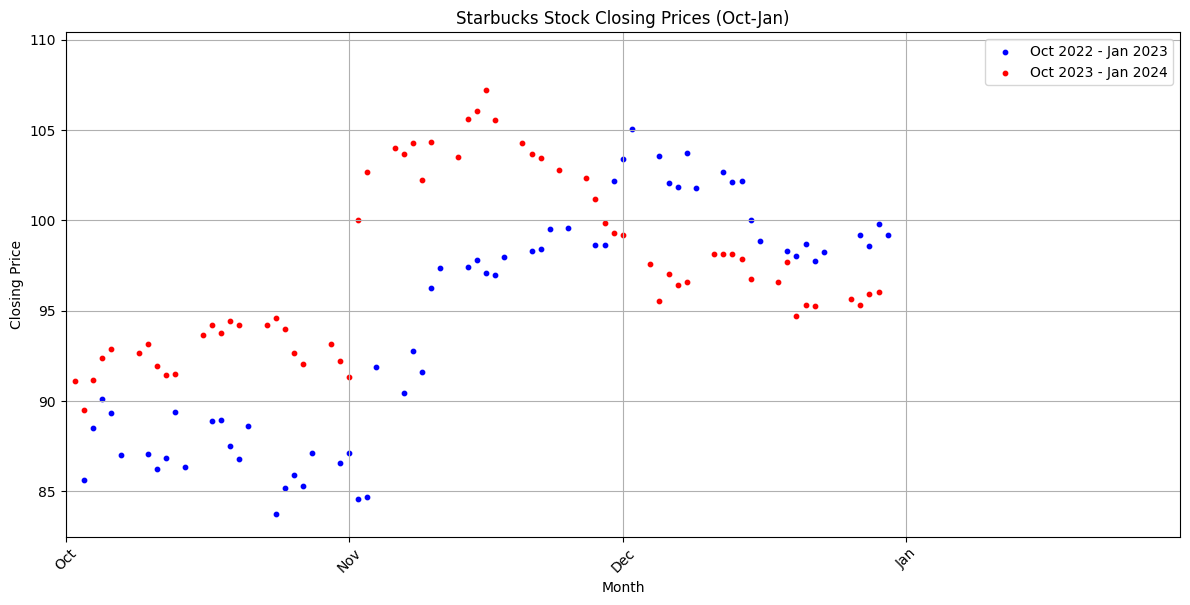

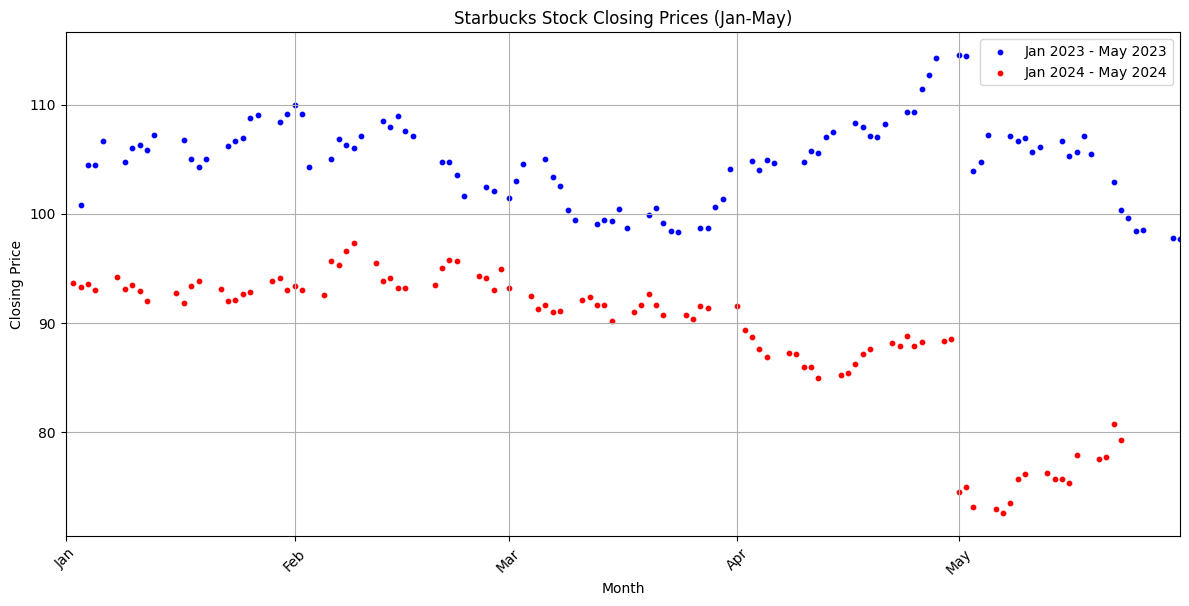

In [ ]:
# Define the periods
oct_2022_to_jan_2023 = df[(df['Date'] >= '2022-10-01') & (df['Date'] <= '2023-01-31')].copy()
jan_2023_to_may_2023 = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-05-31')].copy()

oct_2023_to_jan_2024 = df[(df['Date'] >= '2023-10-01') & (df['Date'] <= '2024-01-31')].copy()
jan_2024_to_may_2024 = df[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2024-05-31')].copy()

# Adjust the dates for comparison
oct_2022_to_jan_2023['Adjusted Date'] = oct_2022_to_jan_2023['Date'].apply(lambda x: x.replace(year=2020))
jan_2023_to_may_2023['Adjusted Date'] = jan_2023_to_may_2023['Date'].apply(lambda x: x.replace(year=2020))

oct_2023_to_jan_2024['Adjusted Date'] = oct_2023_to_jan_2024['Date'].apply(lambda x: x.replace(year=2020))
jan_2024_to_may_2024['Adjusted Date'] = jan_2024_to_may_2024['Date'].apply(lambda x: x.replace(year=2020))

# Plot the first period (October to January)
plt.figure(figsize=(12, 6))
plt.scatter(oct_2022_to_jan_2023['Adjusted Date'], oct_2022_to_jan_2023['Close'], label='Oct 2022 - Jan 2023', color='blue', s=10)
plt.scatter(oct_2023_to_jan_2024['Adjusted Date'], oct_2023_to_jan_2024['Close'], label='Oct 2023 - Jan 2024', color='red', s=10)

# Format the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().set_xlim([pd.Timestamp('2020-10-01'), pd.Timestamp('2021-01-31')])

plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.title('Starbucks Stock Closing Prices (Oct-Jan)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Plot the second period (January to May)
plt.figure(figsize=(12, 6))
plt.scatter(jan_2023_to_may_2023['Adjusted Date'], jan_2023_to_may_2023['Close'], label='Jan 2023 - May 2023', color='blue', s=10)
plt.scatter(jan_2024_to_may_2024['Adjusted Date'], jan_2024_to_may_2024['Close'], label='Jan 2024 - May 2024', color='red', s=10)

# Format the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().set_xlim([pd.Timestamp('2020-01-01'), pd.Timestamp('2020-05-31')])

plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.title('Starbucks Stock Closing Prices (Jan-May)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()




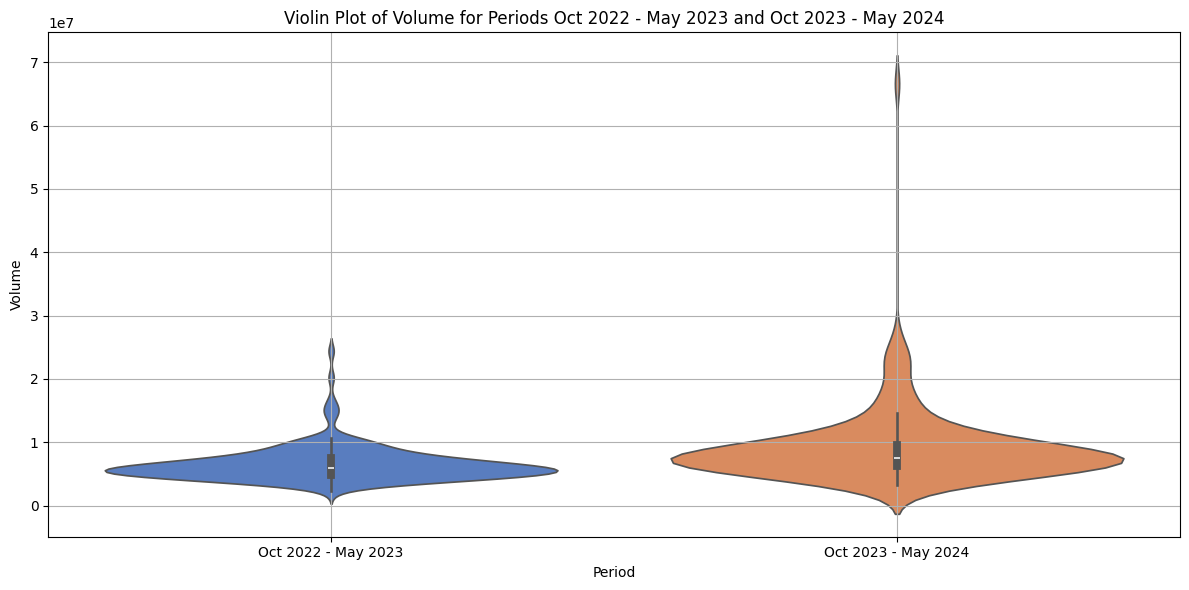

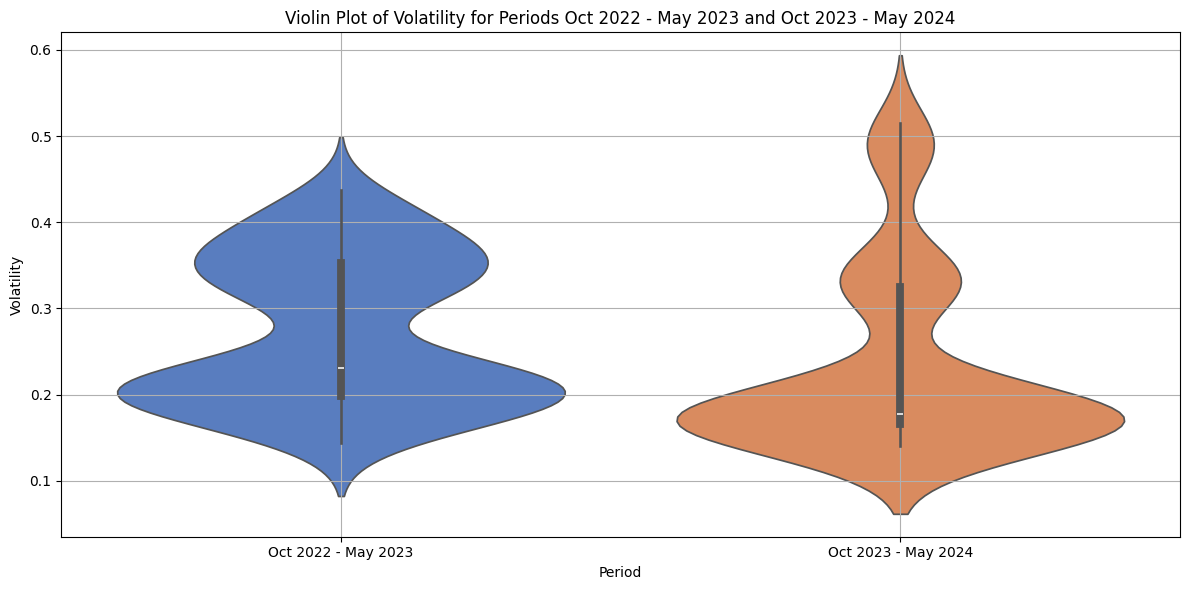

In [ ]:

# Define the periods
oct_2022_to_may_2023 = df[(df['Date'] >= '2022-10-01') & (df['Date'] <= '2023-05-31')].copy()
oct_2023_to_may_2024 = df[(df['Date'] >= '2023-10-01') & (df['Date'] <= '2024-05-31')].copy()

# Adjust the dates for comparison
oct_2022_to_may_2023['Period'] = 'Oct 2022 - May 2023'
oct_2023_to_may_2024['Period'] = 'Oct 2023 - May 2024'

# Combine the datasets for plotting
combined_data = pd.concat([oct_2022_to_may_2023, oct_2023_to_may_2024])

# Plotting volume
plt.figure(figsize=(12, 6))
sns.violinplot(x='Period', y='Volume', hue='Period', data=combined_data, palette='muted', legend=False)
plt.title('Violin Plot of Volume for Periods Oct 2022 - May 2023 and Oct 2023 - May 2024')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting volatility
plt.figure(figsize=(12, 6))
sns.violinplot(x='Period', y='Volatility', hue='Period', data=combined_data, palette='muted', legend=False)
plt.title('Violin Plot of Volatility for Periods Oct 2022 - May 2023 and Oct 2023 - May 2024')
plt.grid(True)
plt.tight_layout()
plt.show()

## Observations on the graphs above:

Volume:
The violin plot for volume shows that during the period from October 2022 to May 2023, the trading volume had a narrower distribution centered around lower values, indicating more consistent and moderate trading activity. Conversely, in the period from October 2023 to May 2024, the distribution of trading volume is broader with a significant peak towards higher volumes. This suggests that trading activity was more volatile with periods of unusually high volume, possibly reflecting heightened market interest or significant events influencing trading behavior during this period.

Volatility:
The violin plot for volatility reveals that the period from October 2022 to May 2023 exhibited a relatively narrower and more consistent range of volatility, suggesting more stable stock price movements. In contrast, the period from October 2023 to May 2024 shows a broader distribution with higher median volatility, indicating increased fluctuations in stock prices. This period seems to have experienced more pronounced volatility, possibly due to market reactions to external factors such as the boycott mentioned.

Analysis:
The data indicates a clear difference in trading behavior and stock price stability between the two periods. The period from October 2023 to May 2024 shows both higher trading volumes and greater volatility. This could be due to significant market events or external factors affecting investor sentiment and behavior. The increased volatility and volume during the latter period suggest a more reactive market, potentially influenced by the mentioned boycott and other economic factors. These patterns highlight the importance of considering external market conditions and events when analyzing stock performance and investor behavior.

## Descriptive Statistics Before And After 

In [ ]:
# Define the periods
oct_2022_to_may_2023 = df[(df['Date'] >= '2022-10-01') & (df['Date'] <= '2023-05-31')].copy()
oct_2023_to_may_2024 = df[(df['Date'] >= '2023-10-01') & (df['Date'] <= '2024-05-31')].copy()

# Calculate descriptive statistics for both periods
stats_2022_2023 = oct_2022_to_may_2023.describe()
stats_2023_2024 = oct_2023_to_may_2024.describe()

# Display the statistics
print("Descriptive Statistics for Oct 2022 - May 2023:")
print(stats_2022_2023)
print("\nDescriptive Statistics for Oct 2023 - May 2024:")
print(stats_2023_2024)

# Compare the statistics
comparison = stats_2023_2024 - stats_2022_2023
print("\nComparison of Descriptive Statistics (Oct 2023 - May 2024) - (Oct 2022 - May 2023):")
print(comparison)

Descriptive Statistics for Oct 2022 - May 2023:
                                Date        Open        High         Low  \
count                            166  166.000000  166.000000  166.000000   
mean   2023-01-30 06:04:20.240963840  100.754096  101.794277   99.846024   
min              2022-10-03 00:00:00   84.070000   85.470001   82.430000   
25%              2022-11-30 06:00:00   98.407501   98.832499   97.282500   
50%              2023-01-31 12:00:00  102.325001  103.235001  101.250000   
75%              2023-03-30 18:00:00  105.922499  106.760002  105.107502   
max              2023-05-31 00:00:00  114.489998  115.480003  114.250000   
std                              NaN    7.028324    6.918279    7.155767   

            Close   Adj Close        Volume  Daily Return  Volatility  \
count  166.000000  166.000000  1.660000e+02    166.000000  166.000000   
mean   100.880241   97.674417  6.557510e+06      0.001040    0.271900   
min     83.760002   80.471626  2.320000e+06     

# Comparison From October to May of The Two Years 2023,2024 and 2022,2023

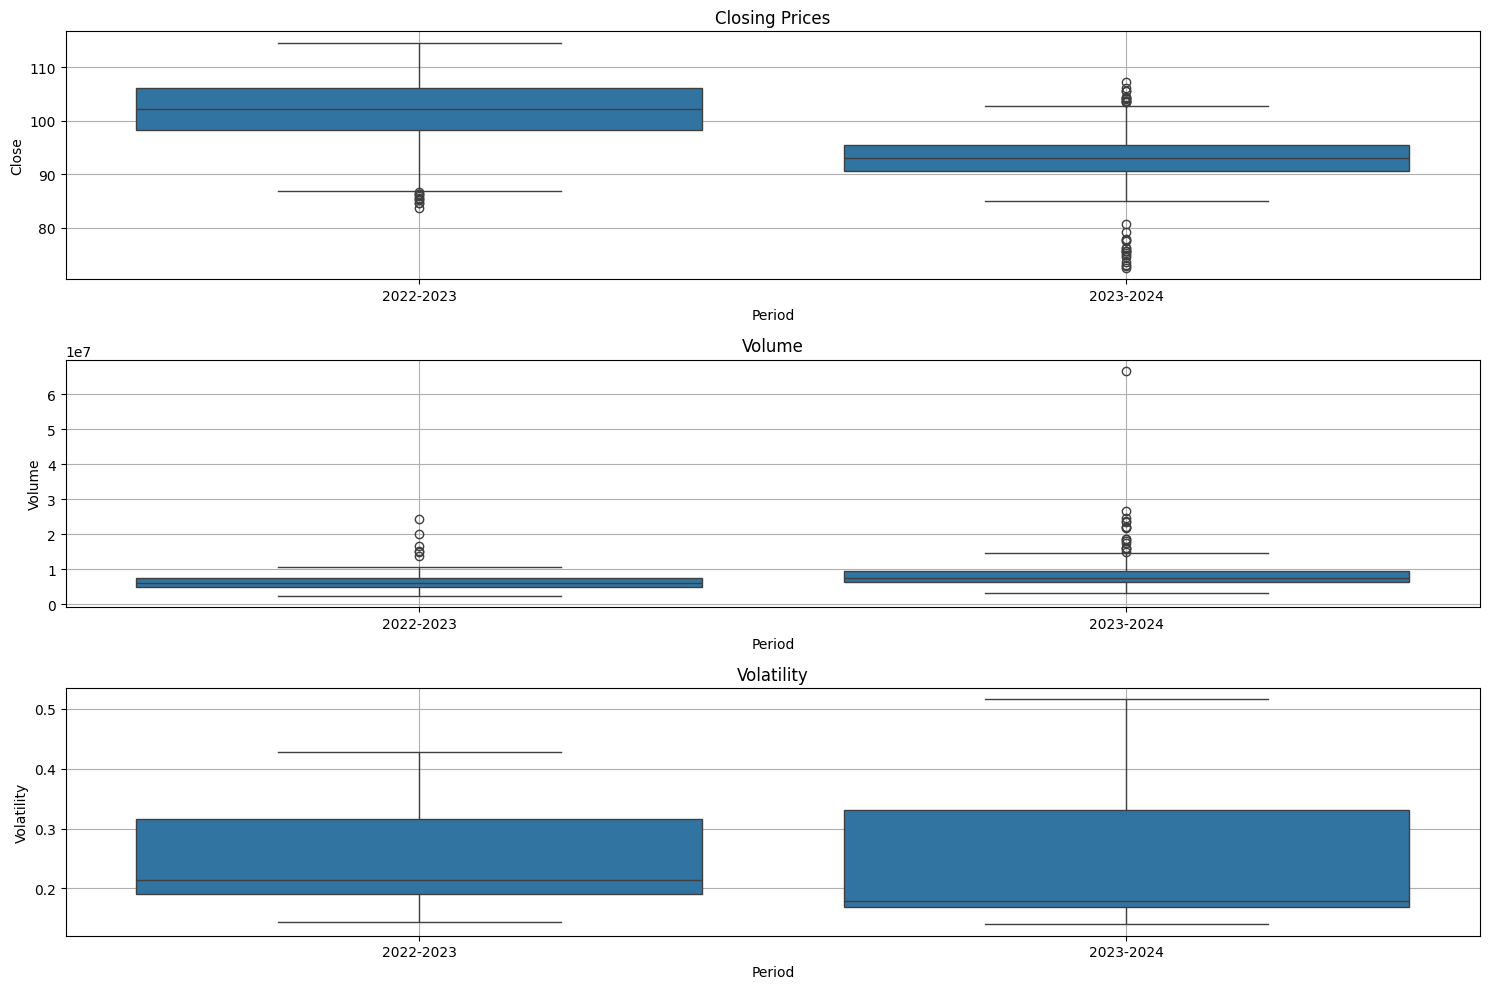

In [ ]:
# Filter the data for the specified periods
oct_to_may_2022_2023 = df[(df['Date'] >= '2022-10-01') & (df['Date'] <= '2023-05-31')].copy()
oct_to_may_2023_2024 = df[(df['Date'] >= '2023-10-01') & (df['Date'] <= '2024-05-31')].copy()

# Calculate rolling volatility (30-day window, annualized)
oct_to_may_2022_2023.loc[:, 'Volatility'] = oct_to_may_2022_2023['Close'].pct_change().rolling(window=30).std() * np.sqrt(252)
oct_to_may_2023_2024.loc[:, 'Volatility'] = oct_to_may_2023_2024['Close'].pct_change().rolling(window=30).std() * np.sqrt(252)

# Combine datasets
oct_to_may_2022_2023.loc[:, 'Period'] = '2022-2023'
oct_to_may_2023_2024.loc[:, 'Period'] = '2023-2024'
combined_df = pd.concat([oct_to_may_2022_2023, oct_to_may_2023_2024])

plt.figure(figsize=(15, 10))

# Closing Prices
plt.subplot(3, 1, 1)
sns.boxplot(x='Period', y='Close', data=combined_df)
plt.title('Closing Prices')
plt.grid(True)

# Volume
plt.subplot(3, 1, 2)
sns.boxplot(x='Period', y='Volume', data=combined_df)
plt.title('Volume')
plt.grid(True)

# Volatility
plt.subplot(3, 1, 3)
sns.boxplot(x='Period', y='Volatility', data=combined_df)
plt.title('Volatility')
plt.grid(True)

plt.tight_layout()
plt.show()

## Observations on the above box plots:

1. Closing Prices:
- 2022-2023:
  - The median closing price is around 100.
  - The interquartile range (IQR) is between approximately 90 and 110.
  - There are several outliers below 90, indicating occasional lower closing prices.
- 2023-2024:
  - The median closing price is slightly lower, around 95.
  - The IQR is between approximately 85 and 105.
  - There are more outliers below 85, indicating increased instances of lower closing prices.
- Comparison:
  - The median closing price has decreased from 2022-2023 to 2023-2024.
  - The IQR has shifted downward, indicating a general decline in closing prices.
  - The number of outliers has increased, suggesting more frequent low closing prices in 2023-2024.

2. Volume:
- 2022-2023:
  - The median trading volume is relatively low.
  - The IQR is very tight around the median, indicating low variability in volume.
  - There are several significant outliers, indicating occasional high trading volumes.
- 2023-2024:
  - The median trading volume remains low and similar to 2022-2023.
  - The IQR is slightly wider but still indicates low variability.
  - There are fewer significant outliers compared to 2022-2023.
- Comparison:
  - The trading volume in both periods shows low median values with occasional spikes.
  - The 2022-2023 period has more significant outliers, suggesting occasional high trading activity.
  - The 2023-2024 period has fewer outliers, indicating steadier trading behavior.

3. Volatility:
- 2022-2023:
  - The median volatility is around 0.3.
  - The IQR is between approximately 0.2 and 0.4, indicating moderate variability in volatility.
  - There are few outliers, indicating consistent volatility levels.
- 2023-2024:
  - The median volatility is similar, around 0.3.
  - The IQR is slightly narrower, indicating more consistent volatility.
  - There are no significant outliers, suggesting stable volatility levels.
- Comparison:
  - The volatility levels are similar in both periods, with a slight reduction in variability in 2023-2024.
  - The absence of significant outliers in 2023-2024 indicates more stable volatility compared to 2022-2023.

Summary:
- Closing Prices: The stock prices have decreased in 2023-2024 compared to 2022-2023, with a shift in the median and IQR downward.
- Volume: There is low variability in trading volume for both periods, with occasional spikes. The 2023-2024 period shows fewer significant outliers.
- Volatility: The volatility levels are consistent between the two periods, with a slight reduction in variability in 2023-2024.

Interpretation:
- The downward shift in closing prices and the decrease in the number of outliers suggest a less favorable market sentiment or performance for Starbucks in the 2023-2024 period compared to 2022-2023.
- The low variability in trading volume and the absence of significant outliers in 2023-2024 indicate steadier trading behavior.
- The consistent volatility levels with reduced variability in 2023-2024 suggest a stable market environment with fewer extreme price movements.

These observations provide valuable insights into the changes in stock performance and market behavior for Starbucks over the two periods.


## Competitor analysis:

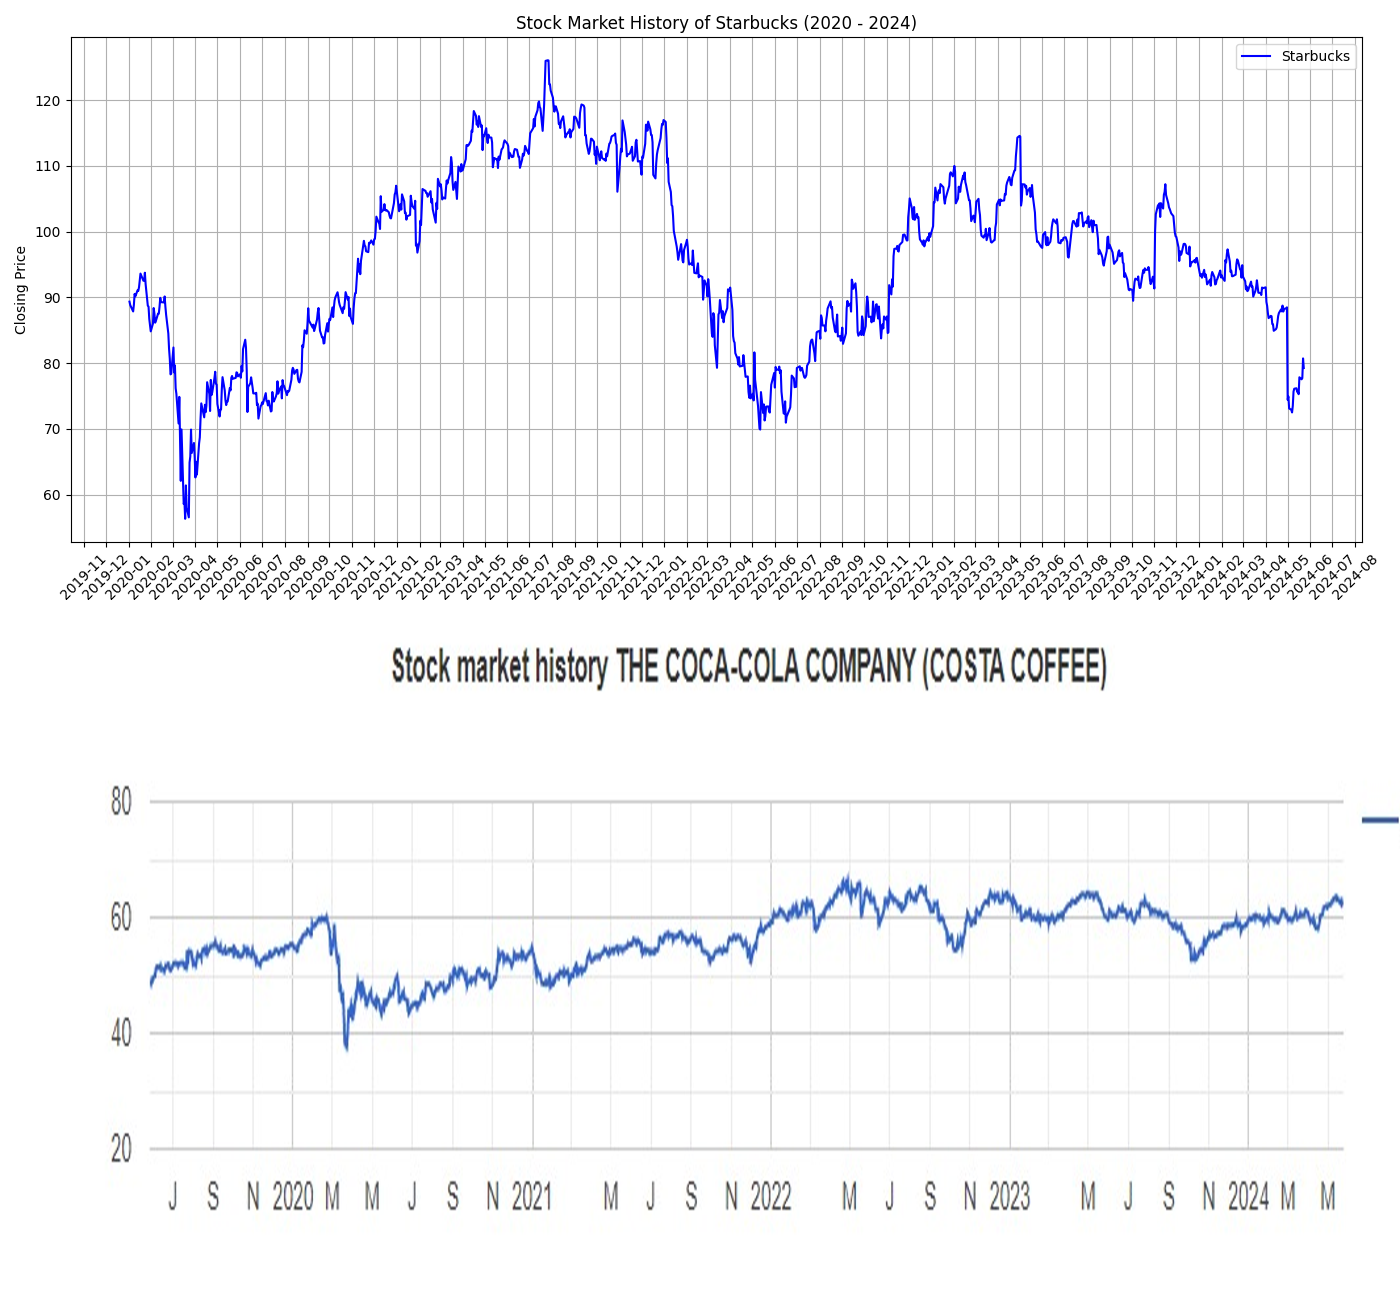

In [ ]:
# Filter data from January 2020 to May 2024 for comparison
starbucks_data = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2024-05-31')]

# Plot the closing prices of Starbucks for the given period
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(starbucks_data['Date'], starbucks_data['Close'], label='Starbucks', color='blue')

# Formatting the x-axis to show months and years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('Stock Market History of Starbucks (2020 - 2024)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

# Save the plot to a buffer
plt.savefig('temp_plot.png')
plt.close(fig)

# Load the plot and the image
plot_img = Image.open('temp_plot.png')
image = Image.open('costa_coffee.jpeg')

image = image.resize((1500, 700))

# Create a new image with enough space for both the plot and the image
total_height = plot_img.height + image.height
combined_img = Image.new('RGB', (plot_img.width, total_height), (255, 600, 600))

# Paste the plot and the image into the new image
combined_img.paste(plot_img, (0, 0))
combined_img.paste(image, (0, plot_img.height))

# Display the combined image
combined_img.show()

## Observation on the above graph comparison:

The boycott of Starbucks starting in October 2023 could indeed be a contributing factor to the observed trends in the stock prices, particularly the sharp decline and subsequent volatility seen in the Starbucks stock graph.

Here's a detailed analysis:

Sharp Decline Post-October 2023: The Starbucks stock graph shows a noticeable drop starting in late 2023. This decline aligns with the timing of the boycott, suggesting that negative public sentiment and reduced consumer demand may have significantly impacted the stock price. Investors likely reacted to the potential loss in revenue and market share due to the boycott, leading to a sell-off in the stock.

Increased Volatility: After the initial decline, the stock shows increased volatility. This can be attributed to the market's uncertainty about the long-term impact of the boycott. Fluctuations in stock prices might reflect changing investor sentiment as new information about the boycott's impact becomes available, including any measures Starbucks took to mitigate the effects or changes in consumer behavior.

Comparison with Costa Coffee: Comparing with Costa Coffee’s steadier performance, it is clear that Costa Coffee did not face the same level of public backlash or market disruption. This relative stability further supports the idea that Starbucks' unique challenges, like the boycott, played a significant role in its stock performance.

Market Reaction: Boycotts can lead to immediate negative market reactions as investors anticipate lower earnings and potential long-term damage to the brand. The impact on Starbucks' stock price is a reflection of these market dynamics, with the sharp decline and subsequent volatility highlighting the investors' concerns.

In conclusion, while there could be multiple factors influencing Starbucks' stock prices, the timing and nature of the decline and increased volatility strongly suggest that the boycott starting in October 2023 had a significant impact. This aligns with typical market behavior in response to boycotts, where investor sentiment quickly adjusts to perceived threats to the company's financial performance and brand reputation.

## Explaining the reason of the immediate short incline after the boycotting

The short, sharp incline in Starbucks' stock prices immediately following the onset of the boycott in October 2023 is an interesting anomaly. Typically, one might expect a boycott to exert downward pressure on a company's stock due to anticipated declines in sales and revenue. However, the observed initial increase could be attributed to opportunistic investor behavior.

When a company faces a significant, but potentially temporary, challenge such as a boycott, some investors might view the resultant dip in stock prices as a buying opportunity. These investors likely believe that the company's fundamentals remain strong and that the boycott's effects will be short-lived. Consequently, they purchase shares at the reduced prices, anticipating a rebound once the boycott ends or its impact diminishes. This surge in buying activity can temporarily drive up the stock price, creating a short-term upward trend.

The rationale behind this behavior is grounded in market psychology and the principles of value investing. Investors who trust in Starbucks' long-term prospects might see the boycott as an overreaction by the market, leading to undervalued stock prices. By capitalizing on this perceived undervaluation, they aim to benefit from the stock's eventual recovery.

## Are the economic conditions the reason or it's just the boycotting?

To determine whether the decline in Starbucks' stock prices after October 2023 is primarily due to the boycott or influenced by broader economic factors, we need to examine key economic indicators such as inflation rates, GDP growth, and unemployment rates during this period.

Inflation Rates
In 2023, the inflation rate in the U.S. saw significant fluctuations, peaking at around 9.1% in June 2022 and then gradually decreasing to 3.2% by October 2023. Throughout 2024, the inflation rate remained relatively stable, fluctuating between 3.1% and 3.5%​ (US Inflation Calc)​​ (Bureau of Labor Statistics)​.

GDP Growth
The GDP growth rate in the U.S. during this period showed signs of recovery from the pandemic-induced recession. In 2023, the GDP growth rate was around 2.1%, indicating moderate economic expansion. This trend continued into 2024, with the GDP growth rate expected to stabilize around 2%​ (Bureau of Labor Statistics)​.

Unemployment Rates
Unemployment rates also provide insight into economic health. In 2023, the unemployment rate was around 3.9%, reflecting a tight labor market. This rate remained consistent into early 2024, indicating that employment levels were stable and not significantly affecting consumer spending power​ (Bureau of Labor Statistics)​.

Analysis
Given these economic indicators, the decline in Starbucks' stock prices post-October 2023 is less likely to be solely attributed to broader economic conditions such as high inflation, GDP growth fluctuations, or unemployment rates. Instead, the immediate drop following the boycott suggests that the boycott had a significant impact on investor sentiment and stock performance.

While it's possible that some investors might have seen the lower stock prices as a buying opportunity, the overall trend indicates that the boycott's influence on consumer behavior and market perceptions likely played a major role in the stock price decline.

In conclusion, while economic factors provide a backdrop to market conditions, the timing and magnitude of the stock price changes suggest that the boycott was a primary driver of the observed decline.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=676d441e-5151-46be-a3df-b5ff4e804de5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

# Hypothesis Testing

Since we are comparing between different periods in parallel, one way ANOVA test is used to test the hypothesis

## Research Question 1: Did the boycott have a significant impact on Starbucks' closing stock prices?

Null hypothesis: There is no difference between the means of close prices in from October 2022 to May 2023 and from October 2023 to May 2024

Alternative hypothesis: The average close prices in the first period is greater than the latest

### Filter the data for periods before and after the boycott date and setting the significance level

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

stock_before = df[(df['Date'] >= '2022-10-10') & (df['Date'] <= '2023-05-21')].copy()
stock_after = df[(df['Date'] >= '2023-10-10') & (df['Date'] <= '2024-05-21')].copy()

alpha = 0.05

### Get the close prices before and after the specified periods

In [ ]:
close_prices_before = stock_before['Close'].reset_index(drop=True)
close_prices_after = stock_after['Close'].reset_index(drop=True)

ANOVA test

In [ ]:
f_statistic, p_value = stats.f_oneway(close_prices_before,close_prices_after)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

F-Statistic: 124.69492042885815
P-Value: 1.5862346891804615e-24
Reject the null hypothesis.
/tmp/ipykernel_529/1619885246.py:1: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  f_statistic, p_value = stats.f_oneway(close_prices_before,close_prices_after)


Null hypothesis is rejected, which means the average means are different. 

The graph will show whether the alternative hypothesis is true or not

In [ ]:
mean1 = np.mean(close_prices_before)
mean2 = np.mean(close_prices_after)

std1 = np.std(close_prices_before, ddof=1)
std2 = np.std(close_prices_after, ddof=1)

n1 = len(close_prices_before)
n2 = len(close_prices_after)

pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

cohen_d = (mean1 - mean2) / pooled_std

print(f"Cohen's d: {cohen_d:.2f}")

Cohen's d: 1.27


The test is highly practically significant

## Research Question 2: Did the boycott have a significant impact on Starbucks' trading volume?

Null hypothesis: There is no difference between the means of volume in from October 2022 to May 2023 and from October 2023 to May 2024

Alternative hypothesis: The average volume in the first period is less than the latest

### Get volume before and after the specified periods

In [ ]:
volume_before = stock_before['Volume'].reset_index(drop=True)
volume_after = stock_after['Volume'].reset_index(drop=True)

ANOVA test

In [ ]:
f_statistic, p_value = stats.f_oneway(volume_before,volume_after)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

F-Statistic: 24.04979518258253
P-Value: 1.524511637171421e-06
Reject the null hypothesis.
/tmp/ipykernel_529/1994810035.py:1: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  f_statistic, p_value = stats.f_oneway(volume_before,volume_after)


Null hypothesis is rejected, which means the average means are different. 

The graph will show whether the alternative hypothesis is true or not

In [ ]:
mean1 = np.mean(volume_before)
mean2 = np.mean(volume_after)

std1 = np.std(volume_before, ddof=1)
std2 = np.std(volume_after, ddof=1)

n1 = len(volume_before)
n2 = len(volume_after)

pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

cohen_d = (mean1 - mean2) / pooled_std

print(f"Cohen's d: {cohen_d:.2f}")

Cohen's d: -0.56


The test is moderately practically significant